ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

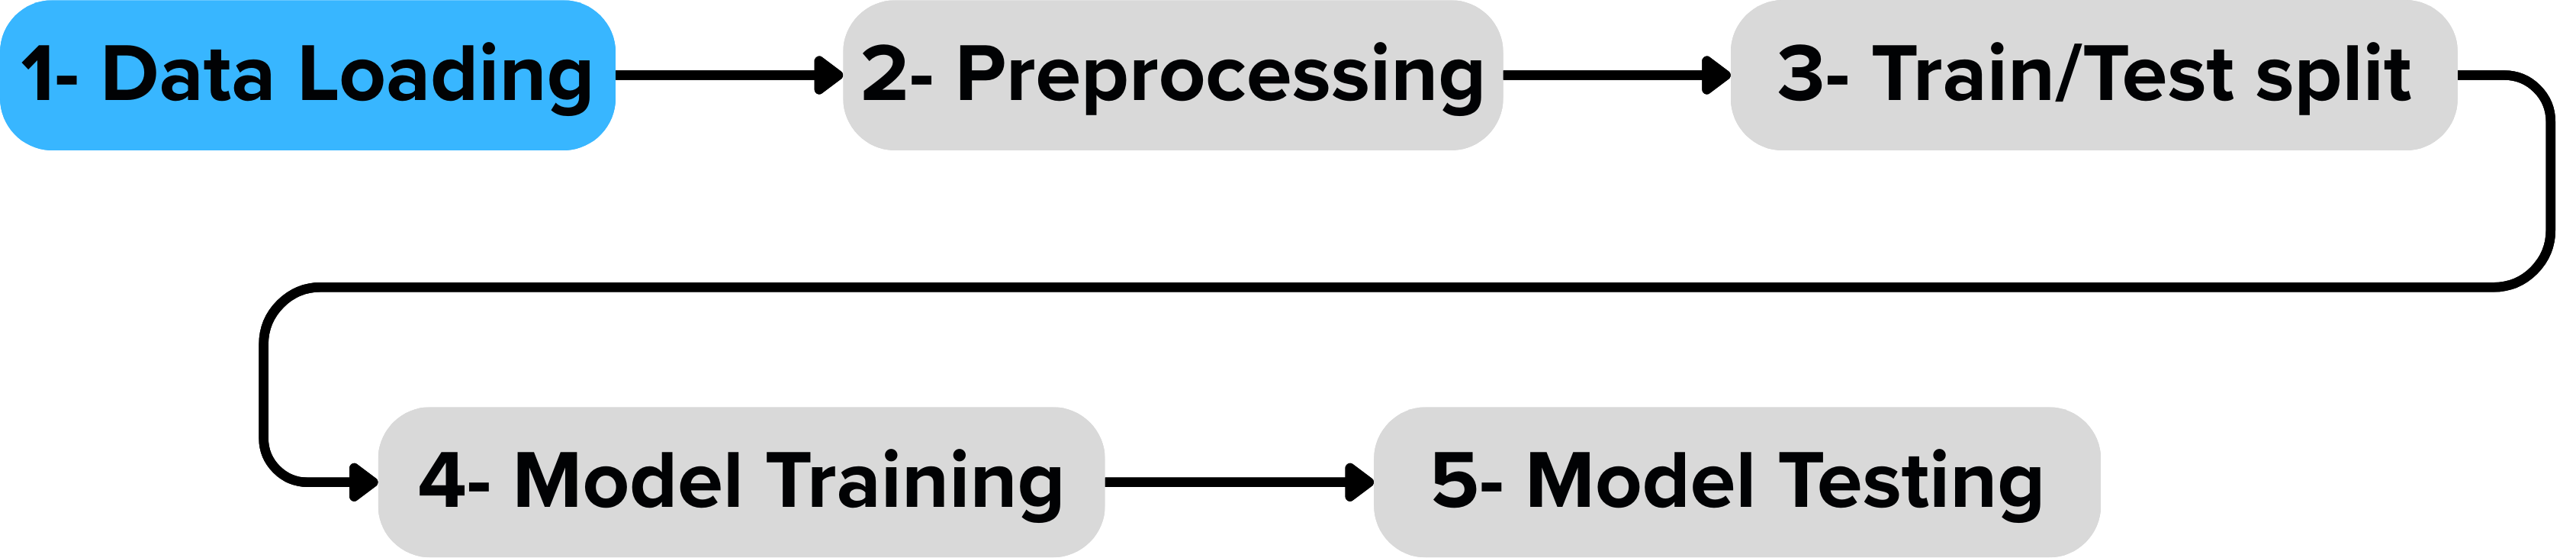

In [6]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [ ]:
import pandas as pd

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv('processed.cleveland.data', names=column_names)
df = pd.read_csv('processed.cleveland.data', names=column_names, na_values='?')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Check Missing Values

In [7]:
# Check all values
print(df.isna())

       age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
298  False  False  False     False  False  False    False    False  False   
299  False  False  False     False  False  False    False    False  False   
300  False  False  False     False  False  False    False    False  False   
301  False  False  False     False  False  False    False    False  False   
302  False  False  False     False  False  False    False    False  False   

     oldpeak  slope     ca   thal  target  
0      False  False  False  Fal

In [8]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Check duplicate rows

In [9]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of rows and columns

In [10]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (303, 14) 

number of rows:  303
number of columns:  14


### Data type of columns

In [11]:
# viewing the data types of columns
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca              str
thal            str
target        int64
dtype: object

In [13]:
print("Data types before cleaning:")
print(df.dtypes)


df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')


df.dropna(inplace=True)


print("\nData types after cleaning:")
print(df.dtypes)

Data types before cleaning:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca              str
thal            str
target        int64
dtype: object

Data types after cleaning:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


### Descriptive summary Statistics

In [ ]:
# Statistical summary
display(df.describe())

# Checking the balance of the target variable
print("\nDistribution of Target (0 = Healthy, 1 = Disease):")
print(df['target'].value_counts())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000



Distribution of Target (0 = Healthy, 1 = Disease):
target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


### Univariate Analysis

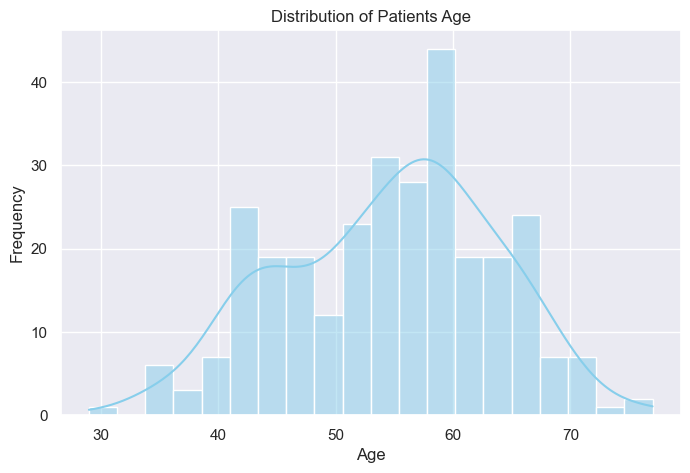

In [ ]:
plt.figure(figsize=(8,5))

# kde=True adds a smooth curve over the bars
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')

plt.title("Distribution of Patients Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

- Shows how shipment sizes are distributed
- Right skew = many small shipments, few large ones

### Distribution of Revenue

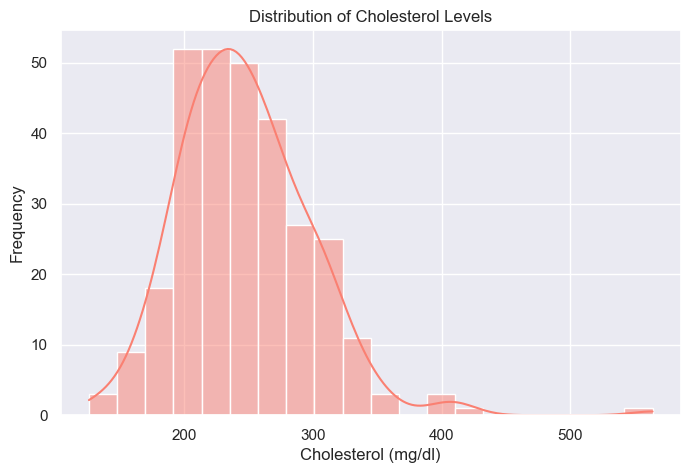

In [ ]:
plt.figure(figsize=(8,5))

sns.histplot(df['chol'], bins=20, color='salmon', kde=True)

plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol (mg/dl)")
plt.ylabel("Frequency")
plt.show()

## Bivariate Analysis

### Revenue by Sex

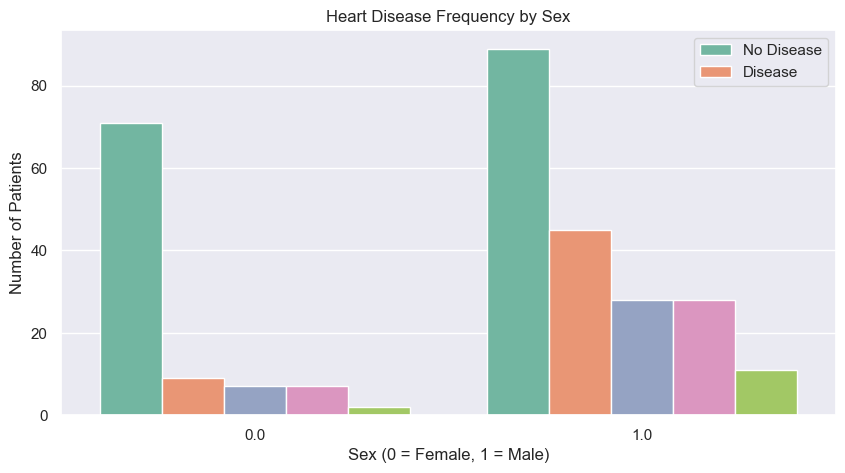

In [ ]:
# sex: 1 = male; 0 = female
# target: 1 = disease; 0 = no disease
plt.figure(figsize=(10,5))
sns.countplot(x='sex', hue='target', data=df, palette='Set2')

plt.title("Heart Disease Frequency by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Disease"])
plt.show()

### Heart Disease Frequency by Chest Pain Type

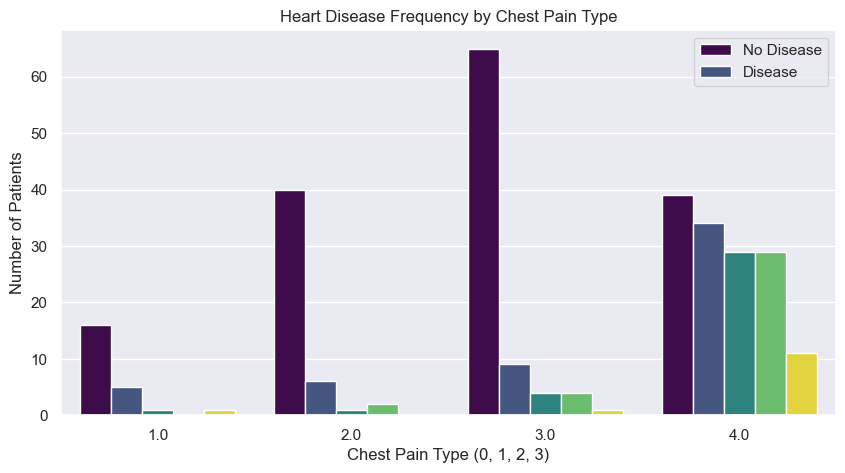

In [ ]:
# cp: Chest Pain Type (values 0, 1, 2, 3)
# target: 1 = disease; 0 = no disease

plt.figure(figsize=(10,5))
sns.countplot(x='cp', hue='target', data=df, palette='viridis')

plt.title("Heart Disease Frequency by Chest Pain Type")
plt.xlabel("Chest Pain Type (0, 1, 2, 3)")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Disease"])
plt.show()

### Heart Disease Frequency by Major Vessels (ca)

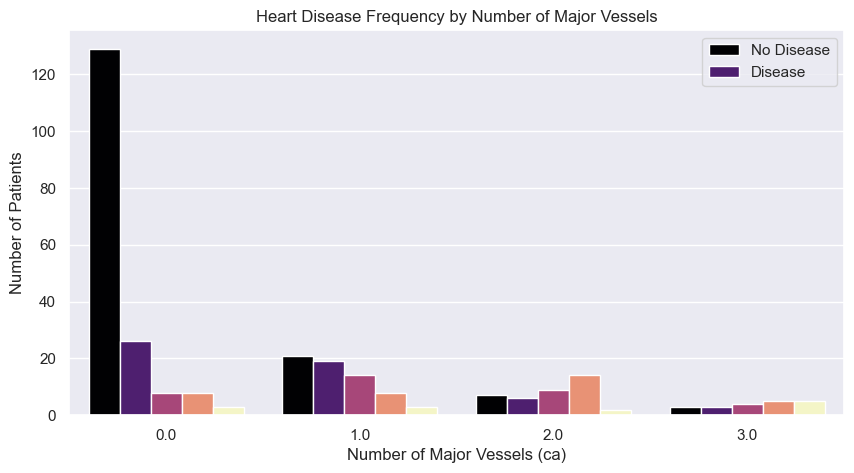

In [ ]:


plt.figure(figsize=(10,5))
sns.countplot(x='ca', hue='target', data=df, palette='magma')

plt.title("Heart Disease Frequency by Number of Major Vessels")
plt.xlabel("Number of Major Vessels (ca)")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Disease"])
plt.show()

### Age vs. Maximum Heart Rate Relationship

C:\Users\qrnby\AppData\Local\Temp\ipykernel_11064\84435717.py:7: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette=['blue', 'red'], alpha=0.7)


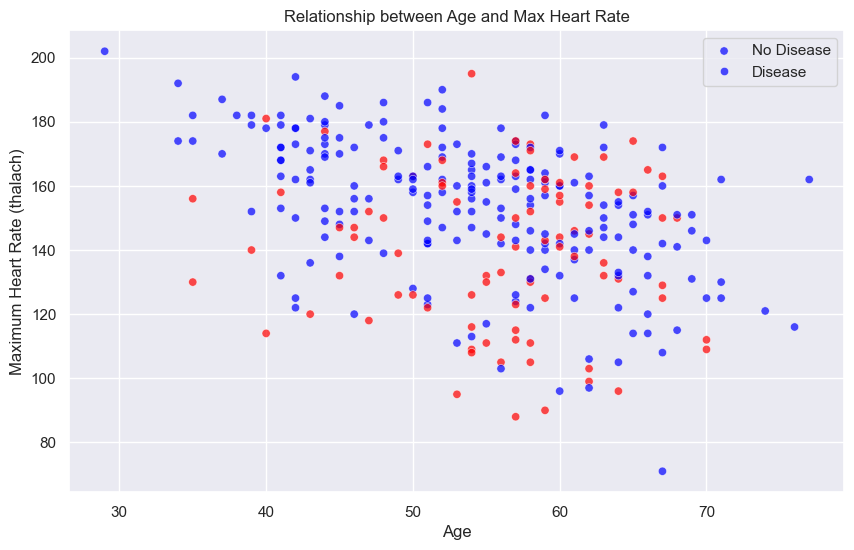

In [ ]:


plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette=['blue', 'red'], alpha=0.7)

plt.title("Relationship between Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.legend(["No Disease", "Disease"])
plt.show()

### Correlation Matrix

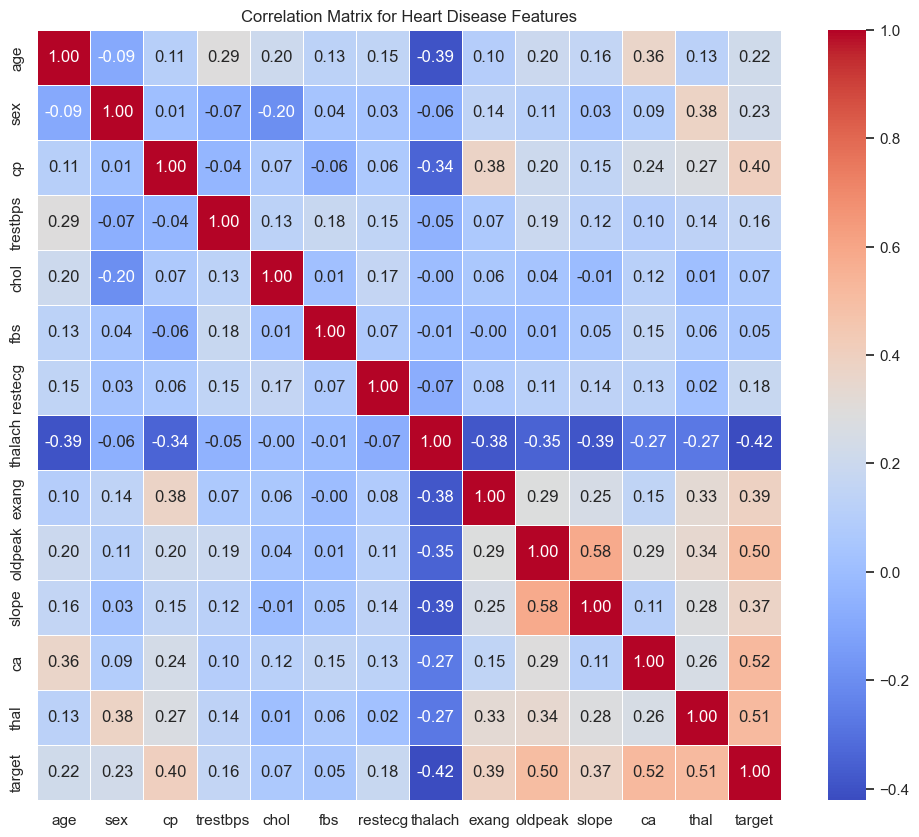

In [28]:
# Compute the correlation matrix
corr_matrix = df.corr()


plt.figure(figsize=(12, 10))



sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title("Correlation Matrix for Heart Disease Features")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Age-Based Heart Rate Trend

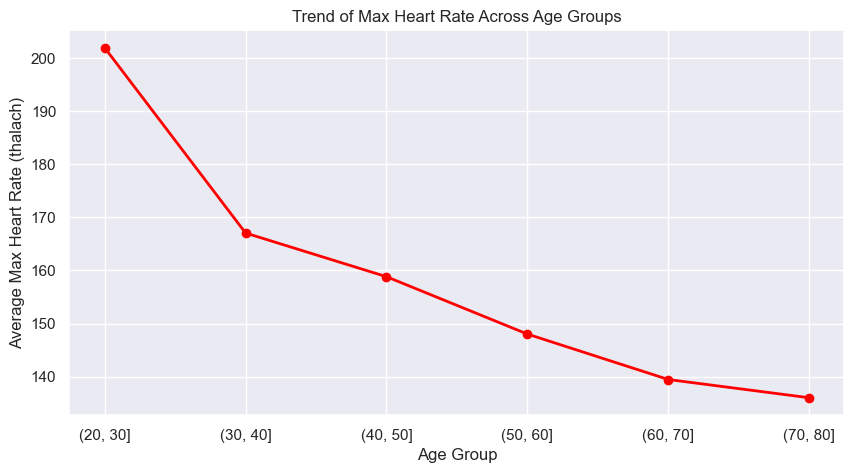

In [29]:
df['Age_Group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80])

age_trend = df.groupby('Age_Group')['thalach'].mean()

plt.figure(figsize=(10,5))
age_trend.plot(kind='line', marker='o', color='red', linewidth=2)

plt.title("Trend of Max Heart Rate Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Average Max Heart Rate (thalach)")
plt.grid(True)
plt.show()

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.